In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv(r'C:\Users\Anas\Desktop\Projects for Data Science\bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [4]:
bank.shape

(45211, 17)

In [5]:
bank['deposit'].value_counts

<bound method IndexOpsMixin.value_counts of 0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: deposit, Length: 45211, dtype: object>

In [6]:
round(bank['deposit'].value_counts(normalize=True) * 100,2)

no     88.3
yes    11.7
Name: deposit, dtype: float64

<AxesSubplot:xlabel='deposit', ylabel='count'>

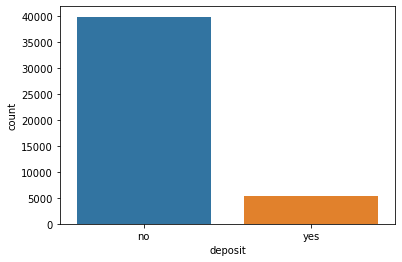

In [7]:
sns.countplot(x='deposit', data = bank)

<AxesSubplot:xlabel='deposit', ylabel='balance'>

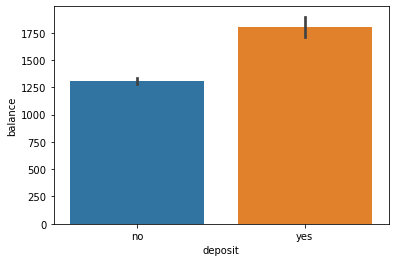

In [8]:
sns.barplot(x='deposit', y='balance', data=bank)

<AxesSubplot:xlabel='campaign', ylabel='count'>

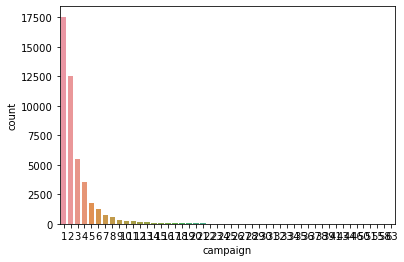

In [9]:
sns.countplot(x='campaign', data=bank)

C:\Users\Anas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


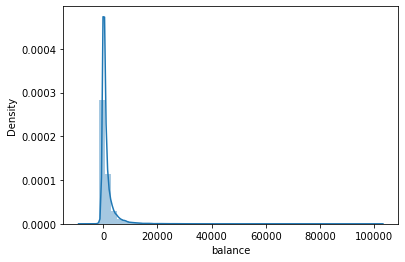

In [10]:
sns.distplot(bank['balance']);

In [11]:
X_features = list(bank.columns)
X_features.remove('deposit')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [12]:
encoded_bank_df = pd.get_dummies(bank[X_features],drop_first = True)

In [13]:
Y=bank.deposit.map(lambda x: int(x== 'yes'))
X=encoded_bank_df

In [14]:
import statsmodels.api as sm

In [15]:
logit_model = sm.Logit(Y,sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 8


In [16]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.339     
Dependent Variable:  deposit           AIC:               21648.2702
Date:                2021-08-13 06:26  BIC:               22023.1913
No. Observations:    45211             Log-Likelihood:    -10781.   
Df Model:            42                LL-Null:           -16315.   
Df Residuals:        45168             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -2.5356   0.1837 -13.8028 0.0000 -2.8957 -2.1756
age                  0.0001   0.0022   0.0511 0.9592 -0.0042  0.0044
balance              0.0000   0.0000   2.4934 0.0127  0.0000  0.0000
day                  0.0100   0.0025   3.9929 0.0001  0.0051  0.0149
duration             0.0042   0.0001  64.9852 0.0000  0.0041  0.0043
campaign            -0.0908   0.0101  -8.9551 0.0000 -0.1107 -0.0709
pdays               -0.0001   0.0003  -0.3355 0.7373 -0.0007  0.0005
previous             0.0102   0.0065   1.5612 0.1185 -0.0026  0.0229
job_blue-collar     -0.3099   0.0727  -4.2641 0.0000 -0.4523 -0.1674
job_entrepreneur    -0.3571   0.1256  -2.8440 0.0045 -0.6032 -0.1110
job_housemaid       -0.5040   0.1365  -3.6931 0.0002 -0.7715 -0.2365
job_management      -0.1653   0.0733  -2.2550 0.0241 -0.3089 -0.0216
job_retired          0.2524   0.0972   2.5958 0.0094  0.0618  0.4429
job_self-employed   -0.2983   0.1120  -2.6638 0.0077 -0.5178 -0.0788
job_services        -0.2238   0.0841  -2.6622 0.0078 -0.3886 -0.0590
job_student          0.3821   0.1090   3.5049 0.0005  0.1684  0.5958
job_technician      -0.1760   0.0689  -2.5535 0.0107 -0.3111 -0.0409
job_unemployed      -0.1767   0.1116  -1.5828 0.1135 -0.3955  0.0421
job_unknown         -0.3133   0.2335  -1.3418 0.1797 -0.7708  0.1443
marital_married     -0.1795   0.0589  -3.0462 0.0023 -0.2949 -0.0640
marital_single       0.0925   0.0673   1.3752 0.1691 -0.0393  0.2243
education_secondary  0.1835   0.0648   2.8325 0.0046  0.0565  0.3105
education_tertiary   0.3789   0.0753   5.0311 0.0000  0.2313  0.5266
education_unknown    0.2505   0.1039   2.4108 0.0159  0.0468  0.4541
default_yes         -0.0167   0.1628  -0.1024 0.9184 -0.3358  0.3025
housing_yes         -0.6754   0.0439 -15.3953 0.0000 -0.7614 -0.5894
loan_yes            -0.4254   0.0600  -7.0906 0.0000 -0.5430 -0.3078
contact_telephone   -0.1634   0.0752  -2.1729 0.0298 -0.3107 -0.0160
contact_unknown     -1.6232   0.0732 -22.1831 0.0000 -1.7666 -1.4798
month_aug           -0.6939   0.0785  -8.8424 0.0000 -0.8477 -0.5401
month_dec            0.6911   0.1767   3.9117 0.0001  0.3448  1.0374
month_feb           -0.1473   0.0894  -1.6476 0.0994 -0.3226  0.0279
month_jan           -1.2617   0.1217 -10.3672 0.0000 -1.5003 -1.0232
month_jul           -0.8308   0.0774 -10.7331 0.0000 -0.9825 -0.6791
month_jun            0.4536   0.0937   4.8428 0.0000  0.2700  0.6372
month_mar            1.5899   0.1199  13.2652 0.0000  1.3550  1.8248
month_may           -0.3991   0.0723  -5.5213 0.0000 -0.5408 -0.2574
month_nov           -0.8734   0.0844 -10.3471 0.0000 -1.0388 -0.7080
month_oct            0.8814   0.1080   8.1591 0.0000  0.6697  1.0932
month_sep            0.8741   0.1195   7.3144 0.0000  0.6398  1.1083
poutcome_other       0.2035   0.0899   2.2645 0.0235  0.0274  0.3796
poutcome_success     2.2911   0.0823  27.8212 0.0000  2.1297  2.4525
poutcome_unknown    -0.0918   0.0935  -0.9820 0.3261 -0.2750  0.0914
====================================================================

"""

In [17]:
X_features = ['previous',
             'pdays',
             'job_unknown',
             'poutcome_unknown',
             'default_yes',
             'age']

In [18]:
logit_model_2 = sm.Logit(Y,sm.add_constant( X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.346355
         Iterations 7


In [19]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.040      
Dependent Variable: deposit          AIC:              31332.1352 
Date:               2021-08-13 06:26 BIC:              31393.1689 
No. Observations:   45211            Log-Likelihood:   -15659.    
Df Model:           6                LL-Null:          -16315.    
Df Residuals:       45204            LLR p-value:      1.8178e-280
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -0.7445   0.0845  -8.8080 0.0000 -0.9101 -0.5788
previous           0.0027   0.0055   0.4864 0.6267 -0.0081  0.0134
pdays             -0.0033   0.0003 -13.2844 0.0000 -0.0038 -0.0028
job_unknown        0.0388   0.1866   0.2080 0.8353 -0.3269  0.4046
poutcome_unknown  -1.7862   0.0629 -28.3953 0.0000 -1.9095 -1.6630
default_yes       -0.4845   0.1448  -3.3456 0.0008 -0.7684 -0.2007
age                0.0059   0.0014   4.3092 0.0000  0.0032  0.0085
==================================================================

"""

In [20]:
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':logit_model_2.predict(sm.add_constant
                         (X[X_features]))})

In [21]:
y_pred_df

,actual,predicted_prob
0,0,0.100859
1,0,0.093663
2,0,0.088336
3,0,0.095165
4,0,0.091512
...,...,...
45206,1,0.097202
45207,1,0.107976
45208,1,0.283424
45209,0,0.100329


In [22]:
#Now sort predicted probabilities  in  descending order
import pandas as pd
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':logit_model_2.predict(sm.add_constant(X[X_features]))})
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)

In [23]:
sorted_predict_df

,predicted_prob,actual
44420,0.445446,1
44410,0.429720,0
44403,0.418028,1
44401,0.410151,1
44421,0.406676,0
...,...,...
44858,0.033434,1
44837,0.033416,0
44829,0.033364,1
43978,0.023316,0


In [24]:
num_per_decile = int(len(sorted_predict_df)/10)
print("Number of observation per decile: ", num_per_decile)

Number of observation per decile:  4521


In [25]:
def get_deciles(df):
    df['decile']=1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    df['decile'] = df['decile']+1
    return df

In [26]:
deciles_predict_df = get_deciles(sorted_predict_df)

In [27]:
deciles_predict_df

,predicted_prob,actual,decile
44420,0.445446,1,1
44410,0.429720,0,1
44403,0.418028,1,1
44401,0.410151,1,1
44421,0.406676,0,1
...,...,...,...
44858,0.033434,1,10
44837,0.033416,0,10
44829,0.033364,1,10
43978,0.023316,0,10


In [28]:
gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']

In [29]:
gain_lift_df

,decile,gain
0,1,1401
1,2,755
2,3,356
3,4,318
4,5,327
5,6,331
6,7,344
7,8,406
8,9,423
9,10,628


In [30]:
gain_lift_df['gain_percentage']=(100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,1401,26.488939
1,2,755,40.763849
2,3,356,47.494801
3,4,318,53.507279
4,5,327,59.689922
5,6,331,65.948194
6,7,344,72.452259
7,8,406,80.128569
8,9,423,88.126300
9,10,628,100.000000


<function matplotlib.pyplot.show(close=None, block=None)>

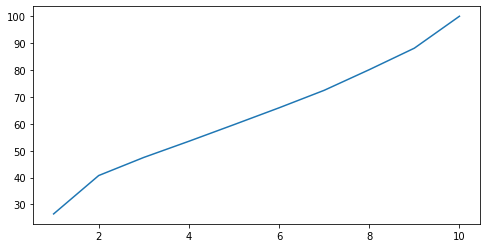

In [31]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')
plt.show

In [44]:
gain_lift_df['lift']= (gain_lift_df.gain_percentage/(gain_lift_df.decile*100))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,1401,26.488939,0.264889
1,2,755,40.763849,0.203819
2,3,356,47.494801,0.158316
3,4,318,53.507279,0.133768
4,5,327,59.689922,0.119380
5,6,331,65.948194,0.109914
6,7,344,72.452259,0.103503
7,8,406,80.128569,0.100161
8,9,423,88.126300,0.097918
9,10,628,100.000000,0.100000


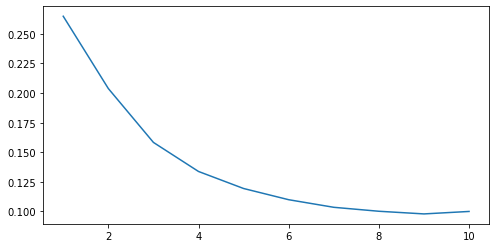

In [45]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logit = LogisticRegression()
logit.fit(X,Y)

C:\Users\Anas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pred_y = logit.predict_proba(X)

In [49]:
pred_y

array([[0.95360114, 0.04639886],
       [0.97403607, 0.02596393],
       [0.98099978, 0.01900022],
       ...,
       [0.34169379, 0.65830621],
       [0.91508278, 0.08491722],
       [0.90340879, 0.09659121]])

In [50]:
type(pred_y)

numpy.ndarray

In [51]:
y_pred_df_new = pd.DataFrame({'actual':Y, 'predicted_prob': pred_y[:, 1]})

In [52]:
y_pred_df_new.head()

,actual,predicted_prob
0,0,0.046399
1,0,0.025964
2,0,0.019000
3,0,0.021479
4,0,0.107598


In [53]:
sorted_predict_df_new = y_pred_df_new[['predicted_prob','actual']].sort_values('predicted_prob',ascending =False)

In [54]:
deciles_predict_df_new = get_deciles(sorted_predict_df_new)

In [55]:
deciles_predict_df_new[0:20]

,predicted_prob,actual,decile
24148,1.000000,0,1
44602,0.999987,0,1
9947,0.999978,1,1
24095,0.999964,0,1
19639,0.999961,0,1
21113,0.999958,0,1
24044,0.999927,1,1
12347,0.999819,1,1
28872,0.999780,0,1
31337,0.999652,1,1


In [57]:
gain_lift_df_new = pd.DataFrame(deciles_predict_df_new.groupby('decile')['actual'].
sum()).reset_index()
gain_lift_df_new.columns = ['decile', 'gain']

In [58]:
gain_lift_df_new['gain_percentage']=(100*gain_lift_df_new.gain.cumsum()/gain_lift_df_new.gain.sum())

In [59]:
gain_lift_df_new

,decile,gain,gain_percentage
0,1,2294,43.373038
1,2,1225,66.534317
2,3,704,79.844961
3,4,367,86.783891
4,5,244,91.397240
5,6,180,94.800529
6,7,121,97.088296
7,8,62,98.260541
8,9,40,99.016827
9,10,52,100.000000


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

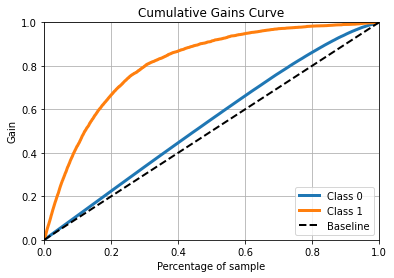

In [63]:
import scikitplot as skplt
#following line is used to find Gains Curve
skplt.metrics.plot_cumulative_gain(Y,pred_y)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

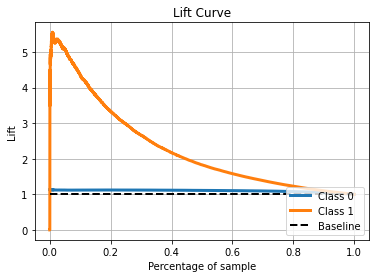

In [65]:
skplt.metrics.plot_lift_curve(Y,pred_y)